In [1]:
your_local_path = 'E:/DataScience/Practice/Datasets/'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [4]:
flight = pd.read_csv(your_local_path+'flight_data.csv',parse_dates=[[0,1,2]])
flight.head()

,year_month_day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013-01-01,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013-01-01,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013-01-01,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013-01-01,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013-01-01,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [9]:
flight[['dep_time','dep_delay','arr_time','arr_delay','air_time']].describe()

,dep_time,dep_delay,arr_time,arr_delay,air_time
count,328521.000000,328521.000000,328063.000000,327346.000000,327346.000000
mean,1349.109947,12.639070,1502.054999,6.895377,150.686460
std,488.281791,40.210061,533.264132,44.633292,93.688305
min,1.000000,-43.000000,1.000000,-86.000000,20.000000
25%,907.000000,-5.000000,1104.000000,-17.000000,82.000000
50%,1401.000000,-2.000000,1535.000000,-5.000000,129.000000
75%,1744.000000,11.000000,1940.000000,14.000000,192.000000
max,2400.000000,1301.000000,2400.000000,1272.000000,695.000000


# Check for NaN values

In [6]:
pd.isnull(flight).sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [36]:
flight.dtypes

year_month_day    datetime64[ns]
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour                 object
dtype: object

# There are 458 rows where dep time is given but arr time is NaN as seen below. How to resolve?

In [31]:
#fillna_flight = flight[(flight.dep_time.notnull()) & (flight.arr_time.isnull())]
#fillna_flight

,year_month_day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
754,2013-01-01,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,01-01-2013 19:00
1714,2013-01-02,2041.0,2045,-4.0,NaN,2359,NaN,B6,147,N630JB,JFK,RSW,NaN,1074,20,45,02-01-2013 20:00
1756,2013-01-02,2145.0,2129,16.0,NaN,33,NaN,UA,1299,N12221,EWR,RSW,NaN,1068,21,29,02-01-2013 21:00
7039,2013-01-09,615.0,615,0.0,NaN,855,NaN,9E,3856,N161PQ,JFK,ATL,NaN,760,6,15,09-01-2013 06:00
7851,2013-01-09,2042.0,2040,2.0,NaN,2357,NaN,B6,677,N807JB,JFK,LAX,NaN,2475,20,40,09-01-2013 20:00
9284,2013-01-11,1344.0,1350,-6.0,NaN,1518,NaN,EV,4171,N15985,EWR,MSN,NaN,799,13,50,11-01-2013 13:00
11128,2013-01-13,1907.0,1634,153.0,NaN,1837,NaN,EV,4411,N11535,EWR,MEM,NaN,946,16,34,13-01-2013 16:00
11245,2013-01-13,2239.0,2159,40.0,NaN,30,NaN,EV,4519,N17196,EWR,BWI,NaN,169,21,59,13-01-2013 21:00
13268,2013-01-16,837.0,840,-3.0,NaN,1030,NaN,MQ,4521,N722MQ,LGA,RDU,NaN,431,8,40,16-01-2013 08:00
21425,2013-01-25,1452.0,1500,-8.0,NaN,1619,NaN,US,2179,N757UW,LGA,DCA,NaN,214,15,0,25-01-2013 15:00


In [19]:
flight[(flight.carrier == 'EV') & (flight.origin == 'EWR') & (flight.dest == 'OKC')].loc[:,'air_time'].mean()

193.0095238095238

# Fill NaN values with mean values of each column

# Finding outliers.We can change the condition how many times above 75%

# We should do an analysis of outliers also.

In [6]:
dep_delay_outlier = dep_delay_summary['75%']*95

In [7]:
outlier_by_dep_delay_index = flight['dep_delay'] > dep_delay_outlier

In [8]:
outlier_flights_dep_delay = flight[outlier_by_dep_delay_index]

In [9]:
outlier_flights_dep_delay

,year_month_day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013-01-09,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,09-01-2013 09:00
8239,2013-01-10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,10-01-2013 16:00
235778,2013-06-15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,15-06-2013 19:00


# Mean Dep delays Carrier wise

# Plot can be made better by adding colors and showing carrier names as legend

In [43]:
most_dep_delays = flight.groupby('carrier').dep_delay.agg([np.mean])
most_dep_delays

,mean
carrier,
9E,16.725769
AA,8.586016
AS,5.804775
B6,13.022522
DL,9.264505
EV,19.955390
F9,20.215543
FL,18.726075
HA,4.900585


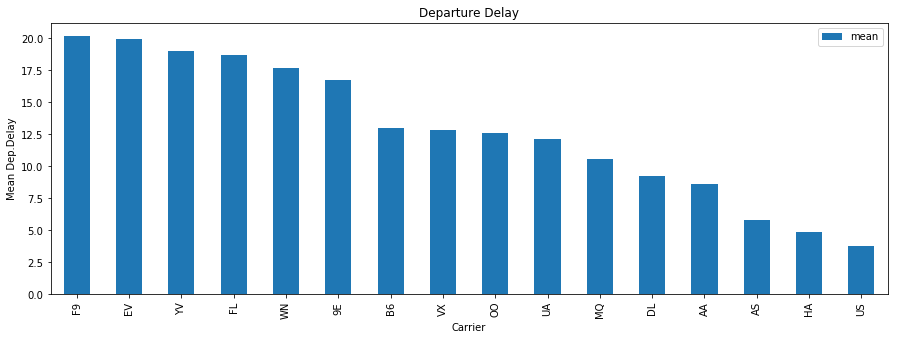

In [44]:
most_dep_delays.sort_values('mean',ascending=False,inplace=True)
most_dep_delays.plot(kind='bar',title='Departure Delay',figsize=(15,5))
plt.xlabel('Carrier')
plt.ylabel('Mean Dep.Delay')





# Mean Arrival Delays carrier wise

In [45]:
most_arr_delays = flight.groupby('carrier').arr_delay.agg([np.mean])
most_arr_delays

,mean
carrier,
9E,7.379669
AA,0.364291
AS,-9.930889
B6,9.457973
DL,1.644341
EV,15.796431
F9,21.920705
FL,20.115906
HA,-6.915205


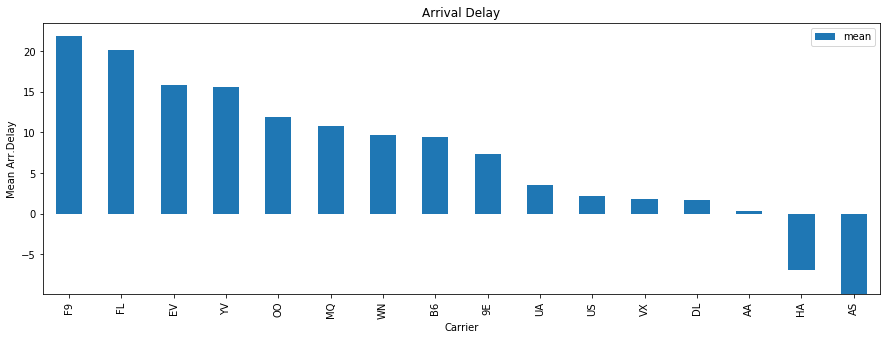

In [46]:
most_arr_delays.sort_values('mean',ascending=False,inplace=True)
most_arr_delays.plot(kind='bar',title='Arrival Delay',figsize=(15,5))
plt.xlabel('Carrier')
plt.ylabel('Mean Arr.Delay')

# Best Airport in terms of Arrival

In [42]:
mean_arr_delays_dest = flight.groupby('dest').arr_delay.mean()
mean_arr_delays_dest.sort_values()

dest
LEX   -22.000000
PSP   -12.722222
SNA    -7.868227
STT    -3.835907
ANC    -2.500000
HNL    -1.365193
SEA    -1.099099
MVY    -0.285714
LGB    -0.062027
SLC     0.176255
LAS     0.257728
MIA     0.299060
DFW     0.322127
LAX     0.547111
MTJ     1.785714
PHX     2.097047
HDN     2.142857
SJU     2.520527
SFO     2.672892
BOS     2.914392
OAK     3.077670
SRQ     3.082431
SAN     3.139166
RSW     3.238150
SJC     3.448171
IAH     4.240790
ABQ     4.381890
MYR     4.603448
ILM     4.635514
ACK     4.852273
         ...    
JAX    11.844834
SMF    12.109929
MDW    12.364224
SDF    12.669384
DAY    12.680486
TVC    12.968421
IAD    13.864202
GSO    14.112601
MKE    14.167220
ALB    14.397129
MCI    14.514058
CRW    14.671642
OMA    14.698898
MHT    14.787554
SAV    15.129506
CVG    15.364564
GSP    15.935443
PVD    16.234637
BHM    16.877323
GRR    18.189560
DSM    19.005736
CAK    19.698337
RIC    20.111253
MSN    20.196043
TYS    24.069204
JAC    28.095238
OKC    30.619048
TUL    33

# Top destinations from all three airports

In [24]:
top_destinations = flight.groupby(['origin','dest']).dest.describe()
top_dest = top_destinations.unstack().sort_values('count',ascending=False)
top_dest


count unique  top   freq
origin dest                          
JFK    LAX   11262      1  LAX  11262
LGA    ATL   10263      1  ATL  10263
       ORD    8857      1  ORD   8857
JFK    SFO    8204      1  SFO   8204
LGA    CLT    6168      1  CLT   6168
EWR    ORD    6100      1  ORD   6100
JFK    BOS    5898      1  BOS   5898
LGA    MIA    5781      1  MIA   5781
JFK    MCO    5464      1  MCO   5464
EWR    BOS    5327      1  BOS   5327
       SFO    5127      1  SFO   5127
LGA    DTW    5040      1  DTW   5040
EWR    CLT    5026      1  CLT   5026
       ATL    5022      1  ATL   5022
       MCO    4941      1  MCO   4941
       LAX    4912      1  LAX   4912
LGA    DFW    4858      1  DFW   4858
JFK    SJU    4752      1  SJU   4752
LGA    DCA    4716      1  DCA   4716
       BOS    4283      1  BOS   4283
JFK    FLL    4254      1  FLL   4254
LGA    FLL    4008      1  FLL   4008
JFK    LAS    3987      1  LAS   3987
EWR    IAH    3973      1  IAH   3973
       FLL    3793      1  FLL   3793
LGA    MSP    3713      1  MSP   3713
       DEN    3704      1  DEN   3704
       MCO    3677      1  MCO   3677
JFK    BUF    3582      1  BUF   3582
LGA    RDU    3581      1  RDU   3581
...            ...    ...  ...    ...
JFK    EGE     103      1  EGE    103
LGA    OMA      95      1  OMA     95
       IND      87      1  IND     87
       TVC      77      1  TVC     77
       SAV      68      1  SAV     68
EWR    MYR      56      1  MYR     56
LGA    CHO      52      1  CHO     52
EWR    PHL      49      1  PHL     49
LGA    GRR      46      1  GRR     46
JFK    SDF      46      1  SDF     46
EWR    BZN      36      1  BZN     36
       TVC      24      1  TVC     24
       JAC      23      1  JAC     23
JFK    PSP      19      1  PSP     19
LGA    EYW      17      1  EYW     17
       BWI      15      1  BWI     15
EWR    MTJ      15      1  MTJ     15
       HDN      15      1  HDN     15
LGA    CAE      12      1  CAE     12
       AVL      10      1  AVL     10
EWR    ANC       8      1  ANC      8
LGA    SBN       6      1  SBN      6
EWR    SBN       4      1  SBN      4
LGA    MYR       3      1  MYR      3
JFK    JAC       2      1  JAC      2
       STL       1      1  STL      1
EWR    LGA       1      1  LGA      1
LGA    LEX       1      1  LEX      1
JFK    MEM       1      1  MEM      1
       BHM       1      1  BHM      1

[224 rows x 4 columns]

# Top 5 busy routes

In [26]:
top5_busy_routes = top_dest.head()
top5_busy_routes

count unique  top   freq
origin dest                          
JFK    LAX   11262      1  LAX  11262
LGA    ATL   10263      1  ATL  10263
       ORD    8857      1  ORD   8857
JFK    SFO    8204      1  SFO   8204
LGA    CLT    6168      1  CLT   6168

In [5]:
flight = flight.set_index('year_month_day')

In [6]:
flight.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
year_month_day,,,,,,,,,,,,,,,,
2013-01-01,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
2013-01-01,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2013-01-01,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
2013-01-01,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
2013-01-01,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# Maximum no of flights departed in day,week,month

# Month wise distribution of Flights

In [12]:
flight_month = flight['carrier'].resample('BM').count()
flight_month

year_month_day
2013-01-31    27004
2013-02-28    24951
2013-03-29    27168
2013-04-30    29996
2013-05-31    28796
2013-06-28    26513
2013-07-31    31155
2013-08-30    28647
2013-09-30    28254
2013-10-31    28889
2013-11-29    26411
2013-12-31    28992
Freq: BM, Name: carrier, dtype: int64

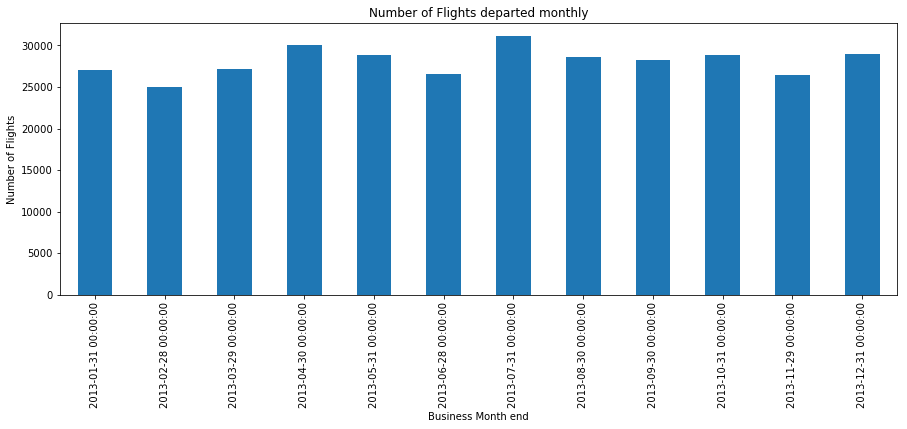

In [14]:
flight_month.plot(kind='bar',title='Number of Flights departed monthly',figsize=(15,5))
plt.xlabel('Business Month end')
plt.ylabel('Number of Flights')

In [10]:
flight_day = flight['carrier'].resample('B').count()
flight_day.sort_values(ascending=False).head()

year_month_day
2013-07-12    2744
2013-07-26    2740
2013-07-19    2738
2013-08-02    2737
2013-08-09    2735
Name: carrier, dtype: int64